In [74]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
def to_kaggle_csv(matrix, header,filename):
    frame = pd.DataFrame(data = matrix,columns=header)
    frame.to_csv(path_or_buf  = filename,index = False,sep =',')
    return frame

In [175]:
train_data = np.genfromtxt(delimiter=',',fname='train.csv',skip_header=True)
test_data = np.genfromtxt(delimiter=',',fname='test.csv',skip_header=True)

In [92]:
from sklearn import preprocessing
train_y = train_data[:,0]
train_x = train_data[:,1:]
print(train_x.max())
print(test_data.max(),train_data.max())
img_width, img_height = 28,28
#train_x = train_x.reshape((train_x.shape[0],28,28,1))
#train_x = np.repeat(train_x,3,axis=3 )
#test_x = test_data.reshape((test_data.shape[0],28,28,1))
#test_x = np.repeat(test_x,3,axis=3)
enc = preprocessing.OneHotEncoder()
enc.fit(train_y.reshape((train_y.shape[0],1)))
train_y = enc.transform(train_y.reshape((train_y.shape[0],1))).toarray()
train_x /= 255
test_x  = test_data/255

255.0
255.0 255.0


In [93]:
print(train_y.shape)
print(train_x.shape)
print(train_x.max())

(42000, 10)
(42000, 784)
1.0


## Training one layer network for mnist dataset
One layer network doesn't have the capacity to overfit to the training data, so we can expect a similar test accuracy to our training accuracy when submitting to kaggle

In [94]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Model
from keras.layers import Input, Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, ZeroPadding2D
from keras import optimizers
from keras import regularizers
from keras.layers.core import Dense, Activation # defining the layers
from keras.optimizers import RMSprop, SGD
from keras.utils import np_utils
from keras import backend as K

In [149]:
def linear_model(optimizer,epochs,train_x,train_y,regularization = 0,valid_x = None,valid_y = None):
    ## model type is either sequential or model, sequential will be almost enough for our course
    linear_model = Sequential()
    ## now we have an empty model that will be created through sequentially adding layers to it.

    ## add a layer that takes the input image and pass it through a fully connected layer with 512 hidden nodes
    ## dense layer ==> fully connected layer
    linear_model.add(Dense(10,input_shape=(784,),kernel_regularizer=regularizers.l2(regularization)))
    linear_model.add(Activation('softmax'))
    ## note that the previous instruction haven't added any activation to the output of the dot product
    ## so we'll add an activation layer with sigmoid activation
    ## no need for validation set as this is a simple linear model
    linear_model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,#RMSprop()
                  metrics=['accuracy'])
    if valid_x is None or valid_y is None:
        history = linear_model.fit(train_x,train_y,
                        batch_size = 64,epochs=epochs,
                        verbose=1)#,validation_data=(test, Y_test))
    else:
        history = linear_model.fit(train_x,train_y,
                        batch_size = 64,epochs=epochs,
                        verbose=1,validation_data=(valid_x, valid_y))#,validation_data=(test, Y_test))
    return linear_model,history

In [120]:
adam_model,adam_history = linear_model('adam',300, train_x,train_y) 
sgd_model,sgd_history = linear_model('sgd', 600, train_x,train_y)
rmsprop_model,rmsprop_history =  linear_model('rmsprop', 300, train_x,train_y)

Epoch 1/300
42000/42000 [==============================] - 4s 85us/step - loss: 0.6170 - acc: 0.8478
Epoch 2/300
42000/42000 [==============================] - 3s 77us/step - loss: 0.3419 - acc: 0.9062
Epoch 3/300
42000/42000 [==============================] - 3s 77us/step - loss: 0.3049 - acc: 0.9150
Epoch 4/300
42000/42000 [==============================] - 3s 76us/step - loss: 0.2871 - acc: 0.9195
Epoch 5/300
42000/42000 [==============================] - 3s 78us/step - loss: 0.2758 - acc: 0.9234
Epoch 6/300
42000/42000 [==============================] - 3s 79us/step - loss: 0.2682 - acc: 0.9250
Epoch 7/300
42000/42000 [==============================] - 3s 78us/step - loss: 0.2621 - acc: 0.9266
Epoch 8/300
42000/42000 [==============================] - 3s 78us/step - loss: 0.2576 - acc: 0.9276
Epoch 9/300
42000/42000 [==============================] - 3s 76us/step - loss: 0.2535 - acc: 0.9289
Epoch 10/300
42000/42000 [==============================] - 3s 77us/step - loss: 0.2507 - a

42000/42000 [==============================] - 3s 76us/step - loss: 0.2043 - acc: 0.9416
Epoch 82/300
42000/42000 [==============================] - 3s 77us/step - loss: 0.2041 - acc: 0.9424
Epoch 83/300
42000/42000 [==============================] - 3s 75us/step - loss: 0.2037 - acc: 0.9425
Epoch 84/300
42000/42000 [==============================] - 3s 76us/step - loss: 0.2039 - acc: 0.9422
Epoch 85/300
42000/42000 [==============================] - 3s 76us/step - loss: 0.2033 - acc: 0.9430
Epoch 86/300
42000/42000 [==============================] - 3s 78us/step - loss: 0.2032 - acc: 0.9428
Epoch 87/300
42000/42000 [==============================] - 3s 76us/step - loss: 0.2032 - acc: 0.9429
Epoch 88/300
42000/42000 [==============================] - 3s 76us/step - loss: 0.2031 - acc: 0.9426
Epoch 89/300
42000/42000 [==============================] - 3s 77us/step - loss: 0.2028 - acc: 0.9430
Epoch 90/300
42000/42000 [==============================] - 3s 78us/step - loss: 0.2025 - acc: 

42000/42000 [==============================] - 3s 80us/step - loss: 0.1931 - acc: 0.9452
Epoch 161/300
42000/42000 [==============================] - 4s 84us/step - loss: 0.1935 - acc: 0.9445
Epoch 162/300
42000/42000 [==============================] - 4s 83us/step - loss: 0.1932 - acc: 0.9448
Epoch 163/300
42000/42000 [==============================] - 3s 83us/step - loss: 0.1934 - acc: 0.9450
Epoch 164/300
42000/42000 [==============================] - 4s 84us/step - loss: 0.1931 - acc: 0.9447
Epoch 165/300
42000/42000 [==============================] - 3s 81us/step - loss: 0.1929 - acc: 0.9453
Epoch 166/300
42000/42000 [==============================] - 3s 82us/step - loss: 0.1931 - acc: 0.9457
Epoch 167/300
42000/42000 [==============================] - 3s 83us/step - loss: 0.1928 - acc: 0.9458
Epoch 168/300
42000/42000 [==============================] - 4s 83us/step - loss: 0.1926 - acc: 0.9444
Epoch 169/300
42000/42000 [==============================] - 4s 83us/step - loss: 0.192

42000/42000 [==============================] - 3s 77us/step - loss: 0.1879 - acc: 0.9467
Epoch 240/300
42000/42000 [==============================] - 3s 79us/step - loss: 0.1878 - acc: 0.9468
Epoch 241/300
42000/42000 [==============================] - 3s 78us/step - loss: 0.1877 - acc: 0.9467
Epoch 242/300
42000/42000 [==============================] - 3s 80us/step - loss: 0.1877 - acc: 0.9470
Epoch 243/300
42000/42000 [==============================] - 3s 79us/step - loss: 0.1878 - acc: 0.9465
Epoch 244/300
42000/42000 [==============================] - 3s 78us/step - loss: 0.1872 - acc: 0.9466
Epoch 245/300
42000/42000 [==============================] - 3s 79us/step - loss: 0.1877 - acc: 0.9470
Epoch 246/300
42000/42000 [==============================] - 3s 81us/step - loss: 0.1876 - acc: 0.9466
Epoch 247/300
42000/42000 [==============================] - 3s 80us/step - loss: 0.1871 - acc: 0.9468
Epoch 248/300
42000/42000 [==============================] - 3s 80us/step - loss: 0.187

42000/42000 [==============================] - 3s 77us/step - loss: 0.3352 - acc: 0.9066
Epoch 19/600
42000/42000 [==============================] - 3s 74us/step - loss: 0.3322 - acc: 0.9075
Epoch 20/600
42000/42000 [==============================] - 3s 79us/step - loss: 0.3294 - acc: 0.9085
Epoch 21/600
42000/42000 [==============================] - 3s 78us/step - loss: 0.3270 - acc: 0.9087
Epoch 22/600
42000/42000 [==============================] - 3s 77us/step - loss: 0.3245 - acc: 0.9097
Epoch 23/600
42000/42000 [==============================] - 3s 78us/step - loss: 0.3223 - acc: 0.9106
Epoch 24/600
42000/42000 [==============================] - 3s 77us/step - loss: 0.3202 - acc: 0.9111
Epoch 25/600
42000/42000 [==============================] - 3s 76us/step - loss: 0.3183 - acc: 0.9110
Epoch 26/600
42000/42000 [==============================] - 3s 77us/step - loss: 0.3165 - acc: 0.9117
Epoch 27/600
42000/42000 [==============================] - 3s 80us/step - loss: 0.3147 - acc: 

42000/42000 [==============================] - 3s 76us/step - loss: 0.2695 - acc: 0.9249
Epoch 99/600
42000/42000 [==============================] - 3s 74us/step - loss: 0.2692 - acc: 0.9247
Epoch 100/600
42000/42000 [==============================] - 3s 78us/step - loss: 0.2689 - acc: 0.9251
Epoch 101/600
42000/42000 [==============================] - 4s 87us/step - loss: 0.2686 - acc: 0.9250
Epoch 102/600
42000/42000 [==============================] - 4s 84us/step - loss: 0.2684 - acc: 0.9254
Epoch 103/600
42000/42000 [==============================] - 3s 79us/step - loss: 0.2681 - acc: 0.9250
Epoch 104/600
42000/42000 [==============================] - 4s 88us/step - loss: 0.2679 - acc: 0.9252
Epoch 105/600
42000/42000 [==============================] - 3s 80us/step - loss: 0.2676 - acc: 0.9250
Epoch 106/600
42000/42000 [==============================] - 3s 81us/step - loss: 0.2674 - acc: 0.9252
Epoch 107/600
42000/42000 [==============================] - 3s 82us/step - loss: 0.2671

42000/42000 [==============================] - 3s 74us/step - loss: 0.2548 - acc: 0.9290
Epoch 178/600
42000/42000 [==============================] - 3s 77us/step - loss: 0.2547 - acc: 0.9293
Epoch 179/600
42000/42000 [==============================] - 3s 79us/step - loss: 0.2545 - acc: 0.9295
Epoch 180/600
42000/42000 [==============================] - 3s 74us/step - loss: 0.2545 - acc: 0.9295
Epoch 181/600
42000/42000 [==============================] - 3s 75us/step - loss: 0.2543 - acc: 0.9295
Epoch 182/600
42000/42000 [==============================] - 3s 75us/step - loss: 0.2542 - acc: 0.9291
Epoch 183/600
42000/42000 [==============================] - 3s 74us/step - loss: 0.2541 - acc: 0.9294
Epoch 184/600
42000/42000 [==============================] - 3s 74us/step - loss: 0.2539 - acc: 0.9293
Epoch 185/600
42000/42000 [==============================] - 3s 72us/step - loss: 0.2538 - acc: 0.9293
Epoch 186/600
42000/42000 [==============================] - 3s 72us/step - loss: 0.253

42000/42000 [==============================] - 3s 72us/step - loss: 0.2468 - acc: 0.9317
Epoch 257/600
42000/42000 [==============================] - 3s 75us/step - loss: 0.2467 - acc: 0.9316
Epoch 258/600
42000/42000 [==============================] - 3s 73us/step - loss: 0.2466 - acc: 0.9312
Epoch 259/600
42000/42000 [==============================] - 3s 73us/step - loss: 0.2465 - acc: 0.9317
Epoch 260/600
42000/42000 [==============================] - 3s 74us/step - loss: 0.2465 - acc: 0.9314
Epoch 261/600
42000/42000 [==============================] - 3s 75us/step - loss: 0.2464 - acc: 0.9316
Epoch 262/600
42000/42000 [==============================] - 3s 73us/step - loss: 0.2463 - acc: 0.9316
Epoch 263/600
42000/42000 [==============================] - 3s 74us/step - loss: 0.2461 - acc: 0.9317
Epoch 264/600
42000/42000 [==============================] - 3s 76us/step - loss: 0.2462 - acc: 0.9315
Epoch 265/600
42000/42000 [==============================] - 3s 75us/step - loss: 0.246

42000/42000 [==============================] - 3s 73us/step - loss: 0.2414 - acc: 0.9333
Epoch 336/600
42000/42000 [==============================] - 3s 75us/step - loss: 0.2413 - acc: 0.9330
Epoch 337/600
42000/42000 [==============================] - 3s 73us/step - loss: 0.2413 - acc: 0.9333
Epoch 338/600
42000/42000 [==============================] - 3s 72us/step - loss: 0.2412 - acc: 0.9332
Epoch 339/600
42000/42000 [==============================] - 3s 71us/step - loss: 0.2411 - acc: 0.9331
Epoch 340/600
42000/42000 [==============================] - 3s 76us/step - loss: 0.2410 - acc: 0.9329
Epoch 341/600
42000/42000 [==============================] - 3s 76us/step - loss: 0.2411 - acc: 0.9333
Epoch 342/600
42000/42000 [==============================] - 3s 76us/step - loss: 0.2410 - acc: 0.9332
Epoch 343/600
42000/42000 [==============================] - 3s 75us/step - loss: 0.2409 - acc: 0.9334
Epoch 344/600
42000/42000 [==============================] - 3s 77us/step - loss: 0.240

42000/42000 [==============================] - 3s 77us/step - loss: 0.2373 - acc: 0.9338
Epoch 415/600
42000/42000 [==============================] - 3s 77us/step - loss: 0.2372 - acc: 0.9340
Epoch 416/600
42000/42000 [==============================] - 3s 74us/step - loss: 0.2373 - acc: 0.9344
Epoch 417/600
42000/42000 [==============================] - 3s 75us/step - loss: 0.2372 - acc: 0.9341
Epoch 418/600
42000/42000 [==============================] - 3s 75us/step - loss: 0.2372 - acc: 0.9344
Epoch 419/600
42000/42000 [==============================] - 3s 74us/step - loss: 0.2371 - acc: 0.9342
Epoch 420/600
42000/42000 [==============================] - 3s 73us/step - loss: 0.2371 - acc: 0.9344
Epoch 421/600
42000/42000 [==============================] - 3s 73us/step - loss: 0.2370 - acc: 0.9342
Epoch 422/600
42000/42000 [==============================] - 3s 75us/step - loss: 0.2370 - acc: 0.9345
Epoch 423/600
42000/42000 [==============================] - 3s 74us/step - loss: 0.236

42000/42000 [==============================] - 3s 73us/step - loss: 0.2341 - acc: 0.9349
Epoch 494/600
42000/42000 [==============================] - 3s 75us/step - loss: 0.2341 - acc: 0.9347
Epoch 495/600
42000/42000 [==============================] - 3s 73us/step - loss: 0.2341 - acc: 0.9350
Epoch 496/600
42000/42000 [==============================] - 3s 78us/step - loss: 0.2340 - acc: 0.9349
Epoch 497/600
42000/42000 [==============================] - 3s 78us/step - loss: 0.2340 - acc: 0.9347
Epoch 498/600
42000/42000 [==============================] - 3s 76us/step - loss: 0.2339 - acc: 0.9348
Epoch 499/600
42000/42000 [==============================] - 3s 75us/step - loss: 0.2339 - acc: 0.9348
Epoch 500/600
42000/42000 [==============================] - 3s 75us/step - loss: 0.2338 - acc: 0.9350
Epoch 501/600
42000/42000 [==============================] - 3s 77us/step - loss: 0.2338 - acc: 0.9350
Epoch 502/600
42000/42000 [==============================] - 3s 77us/step - loss: 0.233

42000/42000 [==============================] - 3s 77us/step - loss: 0.2315 - acc: 0.9353
Epoch 573/600
42000/42000 [==============================] - 3s 73us/step - loss: 0.2314 - acc: 0.9351
Epoch 574/600
42000/42000 [==============================] - 3s 77us/step - loss: 0.2314 - acc: 0.9355
Epoch 575/600
42000/42000 [==============================] - 3s 74us/step - loss: 0.2314 - acc: 0.9356
Epoch 576/600
42000/42000 [==============================] - 3s 76us/step - loss: 0.2313 - acc: 0.9355
Epoch 577/600
42000/42000 [==============================] - 3s 75us/step - loss: 0.2313 - acc: 0.9352
Epoch 578/600
42000/42000 [==============================] - 3s 73us/step - loss: 0.2313 - acc: 0.9353
Epoch 579/600
42000/42000 [==============================] - 3s 74us/step - loss: 0.2312 - acc: 0.9352
Epoch 580/600
42000/42000 [==============================] - 3s 74us/step - loss: 0.2312 - acc: 0.9353
Epoch 581/600
42000/42000 [==============================] - 3s 75us/step - loss: 0.231

42000/42000 [==============================] - 3s 76us/step - loss: 0.2405 - acc: 0.9383
Epoch 53/300
42000/42000 [==============================] - 3s 78us/step - loss: 0.2403 - acc: 0.9375
Epoch 54/300
42000/42000 [==============================] - 3s 77us/step - loss: 0.2405 - acc: 0.9386
Epoch 55/300
42000/42000 [==============================] - 3s 78us/step - loss: 0.2402 - acc: 0.9383
Epoch 56/300
42000/42000 [==============================] - 3s 76us/step - loss: 0.2398 - acc: 0.9384
Epoch 57/300
42000/42000 [==============================] - 3s 75us/step - loss: 0.2397 - acc: 0.9382
Epoch 58/300
42000/42000 [==============================] - 3s 77us/step - loss: 0.2395 - acc: 0.9390
Epoch 59/300
42000/42000 [==============================] - 3s 77us/step - loss: 0.2398 - acc: 0.9386
Epoch 60/300
42000/42000 [==============================] - 3s 77us/step - loss: 0.2395 - acc: 0.9381
Epoch 61/300
42000/42000 [==============================] - 3s 78us/step - loss: 0.2396 - acc: 

42000/42000 [==============================] - 3s 77us/step - loss: 0.2375 - acc: 0.9420
Epoch 133/300
42000/42000 [==============================] - 3s 77us/step - loss: 0.2370 - acc: 0.9418
Epoch 134/300
42000/42000 [==============================] - 3s 77us/step - loss: 0.2372 - acc: 0.9412
Epoch 135/300
42000/42000 [==============================] - 3s 77us/step - loss: 0.2370 - acc: 0.9416
Epoch 136/300
42000/42000 [==============================] - 3s 76us/step - loss: 0.2371 - acc: 0.9410
Epoch 137/300
42000/42000 [==============================] - 3s 79us/step - loss: 0.2374 - acc: 0.9420
Epoch 138/300
42000/42000 [==============================] - 3s 78us/step - loss: 0.2369 - acc: 0.9411
Epoch 139/300
42000/42000 [==============================] - 3s 78us/step - loss: 0.2371 - acc: 0.9413
Epoch 140/300
42000/42000 [==============================] - 3s 77us/step - loss: 0.2369 - acc: 0.9409
Epoch 141/300
42000/42000 [==============================] - 3s 76us/step - loss: 0.237

42000/42000 [==============================] - 3s 76us/step - loss: 0.2370 - acc: 0.9425
Epoch 212/300
42000/42000 [==============================] - 3s 75us/step - loss: 0.2366 - acc: 0.9432
Epoch 213/300
42000/42000 [==============================] - 3s 75us/step - loss: 0.2370 - acc: 0.9429
Epoch 214/300
42000/42000 [==============================] - 3s 76us/step - loss: 0.2369 - acc: 0.9433
Epoch 215/300
42000/42000 [==============================] - 3s 77us/step - loss: 0.2369 - acc: 0.9432
Epoch 216/300
42000/42000 [==============================] - 3s 76us/step - loss: 0.2368 - acc: 0.9429
Epoch 217/300
42000/42000 [==============================] - 3s 76us/step - loss: 0.2369 - acc: 0.9439
Epoch 218/300
42000/42000 [==============================] - 3s 78us/step - loss: 0.2370 - acc: 0.9432
Epoch 219/300
42000/42000 [==============================] - 3s 79us/step - loss: 0.2368 - acc: 0.9435
Epoch 220/300
42000/42000 [==============================] - 3s 79us/step - loss: 0.236

42000/42000 [==============================] - 3s 77us/step - loss: 0.2369 - acc: 0.9445
Epoch 291/300
42000/42000 [==============================] - 3s 76us/step - loss: 0.2367 - acc: 0.9439
Epoch 292/300
42000/42000 [==============================] - 3s 77us/step - loss: 0.2372 - acc: 0.9444
Epoch 293/300
42000/42000 [==============================] - 3s 76us/step - loss: 0.2369 - acc: 0.9437
Epoch 294/300
42000/42000 [==============================] - 3s 75us/step - loss: 0.2369 - acc: 0.9441
Epoch 295/300
42000/42000 [==============================] - 3s 75us/step - loss: 0.2369 - acc: 0.9444
Epoch 296/300
42000/42000 [==============================] - 3s 75us/step - loss: 0.2371 - acc: 0.9437
Epoch 297/300
42000/42000 [==============================] - 3s 74us/step - loss: 0.2371 - acc: 0.9443
Epoch 298/300
42000/42000 [==============================] - 3s 75us/step - loss: 0.2369 - acc: 0.9444
Epoch 299/300
42000/42000 [==============================] - 3s 74us/step - loss: 0.236

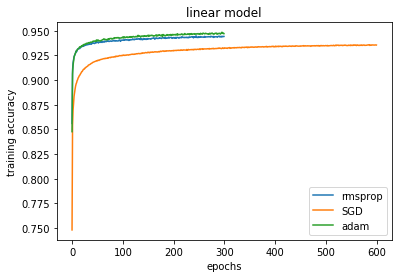

0.94419047619 0.946976190476


In [137]:
plt.figure()
hist1 = rmsprop_history.history['acc']
hist2 = sgd_history.history['acc']
hist3 = adam_history.history['acc']
plt.title('linear model')
plt.xlabel('epochs')
plt.ylabel('training accuracy')
plt.plot(hist1,label='rmsprop')
plt.plot(hist2,label='SGD')
plt.plot(hist3,label='adam')
plt.legend()
plt.show()
print(hist1[-1],hist3[-1])

In [164]:
def generate_submission(model,data,filename,file_columns = None):
    predictions = model.predict(test_x)
    result = predictions.argmax(axis =1 )
    result = result.reshape((28000,1))
    ids = (np.arange(28000)+1).reshape((28000,1))
    result = np.hstack((ids,result))
    m = to_kaggle_csv(result,file_columns, filename)

In [139]:
predictions.shape
result = predictions.argmax(axis =1 )
result.shape
result = result.reshape((28000,1))
ids = (np.arange(28000)+1).reshape((28000,1))
result = np.hstack((ids,result))
print(result[:4,:],result.shape)
m = to_kaggle_csv(result,['ImageId','Label'],'submission_adam_model_300ep_no_regularization.csv')
print(m.head())
#plt.imshow(test_x[3,:].reshape((28,28)))
#plt.show()

[1 2 3 4]
[[1 2]
 [2 0]
 [3 9]
 [4 7]] (28000, 2)
   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      7
4        5      3


### Summary for the linear model
####  The output of the linear model
the submission got the 1653th place out of 1879, this is the top 87.9% with accuracy of 91.6%, which is really bad for mnist dataset, as it's the easiest task you'll ever workon and it's far below our human level accuracy.
Note that training accuracy is around 94.4% and the submission accuracy is around 91.6%.
We've been training for around 270 epochs
<img src="1-linearmodel.PNG" height="300" width = "800" >

## Linear models with regularization

now the model is overfitting --> training acc is 94.4 and submission accuracy is 91.6.
Next step is to add regularization and reduce overfitting --> thus we need a separate validation set to monitor overfitting.
We'll find that a linear model isn't capable of overfitting and any further regularization will only reduce the training error, as the model doesn't have the capacity to overfit

That's why it's a best practice in neural networks to overfit the data first to make sure that your model is good, then add regularization to generalize better, but you shouldn't spend anytime trying to prevent overfitting using a model with high bias (simple models).

In [174]:
from sklearn.model_selection import train_test_split
## validation set
y = train_data[:,0]
X = train_data[:,1:]
enc = preprocessing.OneHotEncoder()
enc.fit(y.reshape((y.shape[0],1)))
train_y = enc.transform(y.reshape((y.shape[0],1))).toarray()
X /= 255
test_x  = test_data/255
train_x, valid_x, train_y, valid_y = train_test_split(X, train_y, test_size=0.2, random_state=42)

print(train_x.max())
print(test_x.max())
print(valid_x.max())

6.0308629411e-08
1.0
6.0308629411e-08


In [171]:
regs = [0.1,0.01,0.001,0.0001,0]
models = []
optimizer = 'rmsprop'
histories = []
for reg in regs:
    model,history = linear_model(optimizer,150, train_x,train_y,regularization=reg,valid_x=valid_x,valid_y=valid_y)
    models.append(model)
    histories.append(history)

Train on 33600 samples, validate on 8400 samples
Epoch 1/150
33600/33600 [==============================] - 4s 122us/step - loss: 2.3712 - acc: 0.1114 - val_loss: 2.3015 - val_acc: 0.1082
Epoch 2/150
33600/33600 [==============================] - 3s 88us/step - loss: 2.3016 - acc: 0.1124 - val_loss: 2.3013 - val_acc: 0.1082
Epoch 3/150
33600/33600 [==============================] - 3s 88us/step - loss: 2.3016 - acc: 0.1124 - val_loss: 2.3012 - val_acc: 0.1082
Epoch 4/150
33600/33600 [==============================] - 3s 89us/step - loss: 2.3016 - acc: 0.1124 - val_loss: 2.3012 - val_acc: 0.1082
Epoch 5/150
 1920/33600 [>.............................] - ETA: 2s - loss: 2.3023 - acc: 0.1172

KeyboardInterrupt: 

In [169]:
print('regularizaiton','training acc','validation acc')
for idx, histor in enumerate(histories):
    tr_acc    = histor.history['acc'][-1]
    valid_acc = histor.history['val_acc'][-1]
    print(regs[idx],tr_acc,valid_acc)




regularizaiton training acc validation acc
0.1 0.837738095238 0.837023809524
0.01 0.889285714286 0.8875
0.001 0.915654761905 0.909404761905
0.0001 0.930863095238 0.919523809524
0 0.944761904762 0.919523809524


In [168]:
## the best model is the one with 0.0001 reg
model = models[-1]
generate_submission(model,test_data,'sub_rmsprop_reg0_150ep_94.4tr_91.9valid.csv',['ImageId','Label'])

| Regularization  | Training acc  | Validation acc  |
| -------------   |:-------------:| ---------------:|
| 0.1             | 83.9          |    83.24        |
| 0.01            | 8899          |    8852         |
| 0.001           | 9159          |    9114         |

<img src="1-linearmodel-latest.PNG" height="300" width = "800" >